In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [25]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result


In [5]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,  date_parser=parser)

C:\Users\harsh\AppData\Local\Temp\ipykernel_38268\575409137.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,  date_parser=parser)


In [14]:
pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,  date_parser=parser)

C:\Users\harsh\AppData\Local\Temp\ipykernel_38268\1214128786.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,  date_parser=parser)


,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


In [12]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]

In [15]:
series

,Total
Date,
2004-01-01,27140
2004-02-01,28526
2004-03-01,28845
2004-04-01,25033
2004-05-01,24764
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


In [16]:
series_1 = series.diff().dropna()

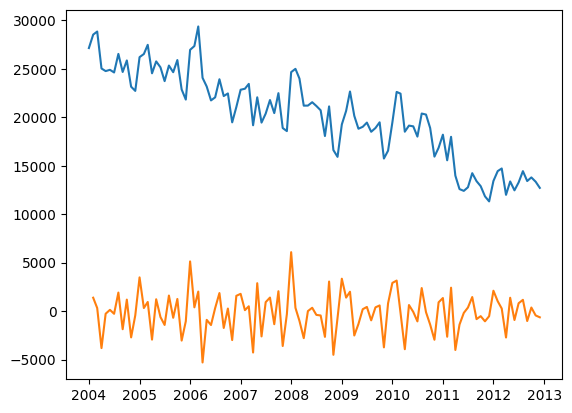

In [17]:
plt.plot(series)
plt.plot(series_1)

In [18]:
series_2 = series_1.diff().dropna()
plt.plot(series_2)

In [28]:
print(perform_adf_test(series_2))

ADF Statistic: -7.162321
p-value: 0.000000
(-7.162321332721395, 2.9462095956893204e-10, 12, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1618.1832433903728)


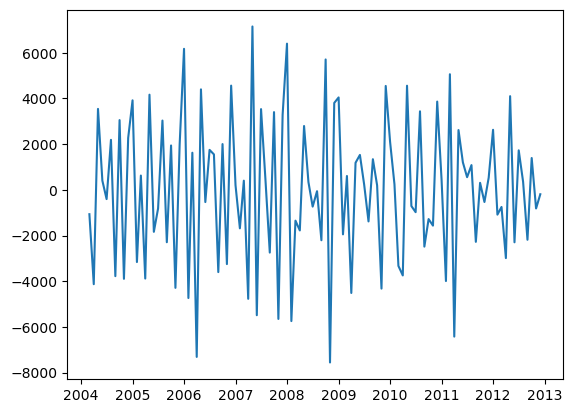

In [9]:
plt.plot(series_2)

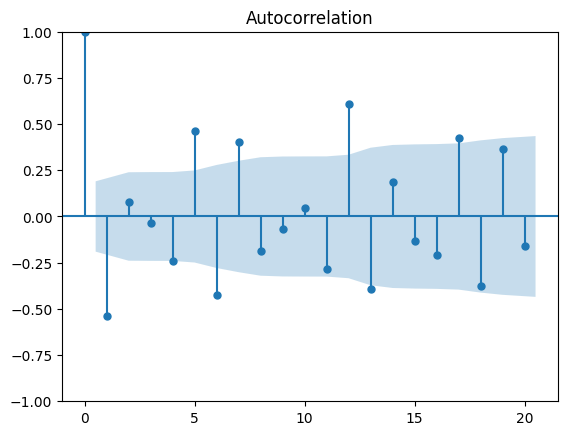

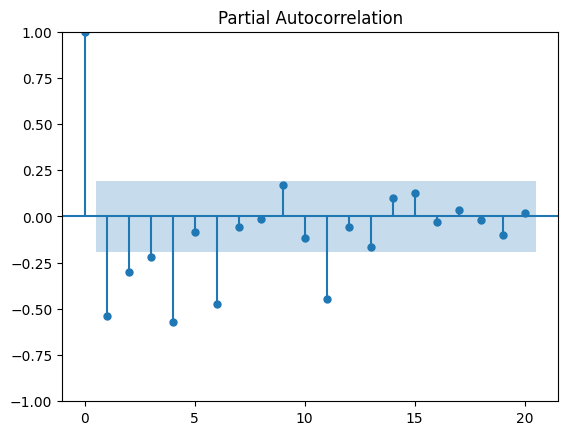

In [29]:
plot_acf(series_2, lags=20)
plot_pacf(series_2, lags=20)
plt.show()

In [30]:
ar_orders = [1, 2, 3,4,6]
ma_orders = [5, 6, 7]
fitted_model_dict = {}

for ar_order in ar_orders:
    for ma_order in ma_orders:
        # Create ARMA(p,q) model
        arma_model = ARIMA(series_2, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

ar_orders = [1, 2, 3,4,6]
ma_orders = [5, 6, 7]

fitted_model_dict = {}

for p, q in product(ar_orders, ma_orders):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series_2, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

# Print AIC and BIC scores for each combination


c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [32]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')


ARMA(1,5) - AIC: 1919.7027879785767, BIC: 1941.0103007314733
ARMA(1,6) - AIC: 1915.4319964079405, BIC: 1939.402948254949
ARMA(1,7) - AIC: 1916.8850867134538, BIC: 1943.5194776545745
ARMA(2,5) - AIC: 1917.9294883383843, BIC: 1941.9004401853929
ARMA(2,6) - AIC: 1916.338530619188, BIC: 1942.9729215603088
ARMA(2,7) - AIC: 1918.5008844830459, BIC: 1947.7987145182785
ARMA(3,5) - AIC: 1918.9402684181753, BIC: 1945.574659359296
ARMA(3,6) - AIC: 1918.2526046392468, BIC: 1947.5504346744794
ARMA(3,7) - AIC: 1915.7510769989394, BIC: 1947.7123461282843
ARMA(4,5) - AIC: 1915.412882761479, BIC: 1944.7107127967117
ARMA(4,6) - AIC: 1884.903227314001, BIC: 1916.8644964433458
ARMA(4,7) - AIC: 1882.8650175036194, BIC: 1917.4897257270761
ARMA(6,5) - AIC: 1875.4311267694084, BIC: 1910.0558349928651
ARMA(6,6) - AIC: 1881.0067160865135, BIC: 1918.2948634040824
ARMA(6,7) - AIC: 1871.6079766487305, BIC: 1911.5595630604116


In [33]:
train_end = datetime(2011,12,1)
test_end = datetime(2012,12,1)

train_data = series_2[:train_end]
test_data = series_2[train_end + timedelta(days=1):test_end]

In [36]:
model = ARIMA(train_data, order=(4,0,6))

In [37]:
model_fit = model.fit()

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   94
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -849.847
Date:                Tue, 19 Mar 2024   AIC                           1711.693
Time:                        21:14:06   BIC                           1726.953
Sample:                    03-01-2004   HQIC                          1717.857
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1432      6.956     -0.308      0.758     -15.777      11.491
ar.L1         -1.0569      0.132     -8.015      0.000      -1.315      -0.798
ar.L2         -0.3115      0.105     -2.974      0.0

In [39]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [40]:
pred_end_date

Timestamp('2012-12-01 00:00:00')

In [74]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residual=test_data["Total"]-predictions

2012-01-01    1659.846897
2012-02-01   -1382.898994
2012-03-01    1173.045012
2012-04-01   -3955.145390
2012-05-01    2129.417919
2012-06-01     -95.890738
2012-07-01    1098.657426
2012-08-01    1519.924555
2012-09-01   -3488.450812
2012-10-01    1408.322509
2012-11-01   -2362.788128
2012-12-01    2272.991714
Freq: MS, Name: predicted_mean, dtype: float64

In [77]:
test_data

,Total
Date,
2012-01-01,2628.0
2012-02-01,-1086.0
2012-03-01,-750.0
2012-04-01,-2989.0
2012-05-01,4100.0
2012-06-01,-2297.0
2012-07-01,1729.0
2012-08-01,353.0
2012-09-01,-2186.0


In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions,test_data["Total"])

2192867.53491862

Text(0, 0.5, 'Sales')

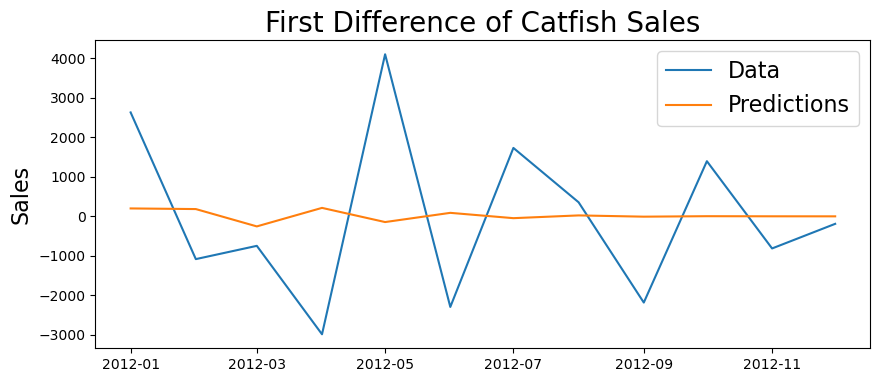

In [54]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)


In [81]:
def invert_diff(last_actual, differences):
    inverted_values = []
    last_observation = last_actual
    for diff in differences:
        inverted_value = last_observation + diff
        inverted_values.append(inverted_value)
        last_observation = inverted_value
    return inverted_values


In [86]:
lv=train_data.iloc[-1][0]


C:\Users\harsh\AppData\Local\Temp\ipykernel_38268\3644557290.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lv=train_data.iloc[-1][0]


120

In [88]:
av=invert_diff(lv,predictions)

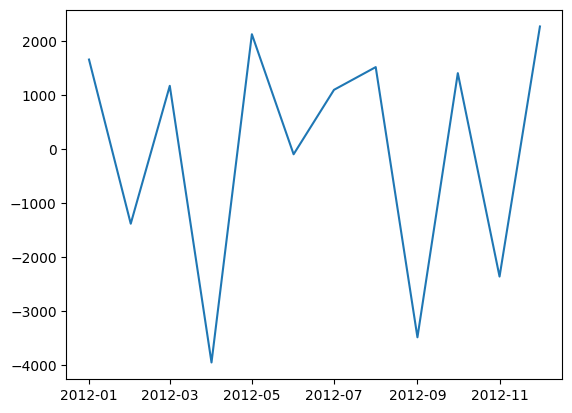

In [91]:
plt.plot(predictions)
